In [1]:
using Plots

┌ Info: Recompiling stale cache file /home/yash/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1190


In [2]:
function olsEstimator(X::Array, y::Array, N::Int)
    Xnew = hcat(X, ones(N))
    Xnew\y  # Solution
end

olsEstimator (generic function with 1 method)

In [3]:
# Regression Problem Part 2
# Data For Regression Problem Part 2
X = rand(100);
y = 2X  + 0.1 * randn(100);

beta = olsEstimator(X, y, 100)
println("Regression problem 2 solution: ", beta)

Regression problem 2 solution: [1.98773, 0.0149129]


In [4]:
?Plots.abline!

Adds ax+b... straight line over the current plot, without changing the axis limits


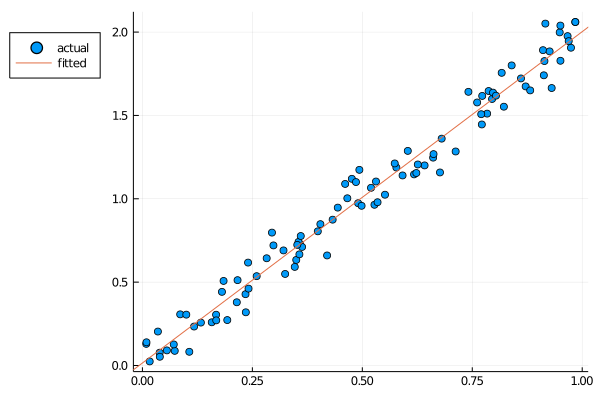

In [5]:
scatter(X, y, legend = :outertopleft, label=:actual)
# beta[1] is the slope, beta[2] is the y-intercept
Plots.abline!(beta[1], beta[2], label=:fitted)
# `abline` takes (slope, intercept), in that order.

### Wilkinson's polynomial

Roots: Complex{Float64}[87.001+0.0im, 58.4541+52.5151im, 58.4541-52.5151im, 2.58007+54.9147im, 2.58007-54.9147im, 1.18199+0.281299im, 1.18199-0.281299im, 0.907396+0.4788im, 0.907396-0.4788im, 0.542199+0.826812im, 0.542199-0.826812im, 0.11158+1.07481im, 0.11158-1.07481im, -0.768317+0.941667im, -0.768317-0.941667im, -0.284531+0.865209im, -0.284531-0.865209im, -0.864338+0.280994im, -0.864338-0.280994im, -0.721189+0.0im]


┌ Warning: Attribute alias `ylabel` detected in the user recipe defined for the signature (::UnitRange{Int32}, ::Array{Complex{Float64},1}). To ensure expected behavior it is recommended to use the default attribute `yguide`.
└ @ Plots /home/yash/.julia/packages/Plots/E3MWZ/src/pipeline.jl:15
┌ Warning: Attribute alias `zlabel` detected in the user recipe defined for the signature (::UnitRange{Int32}, ::Array{Complex{Float64},1}). To ensure expected behavior it is recommended to use the default attribute `zguide`.
└ @ Plots /home/yash/.julia/packages/Plots/E3MWZ/src/pipeline.jl:15


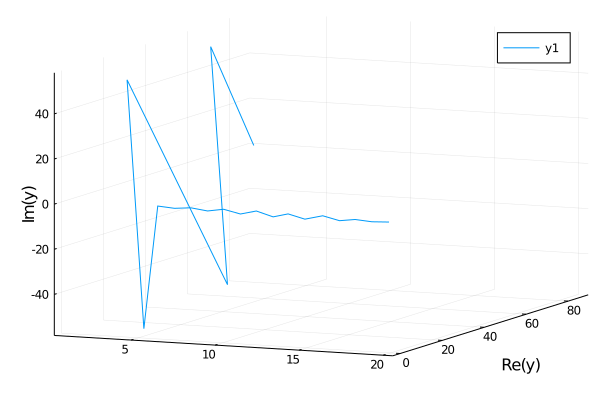

In [6]:
using LinearAlgebra
using Plots
using Polynomials

# Roots of Wilkinson's polynomial.
wilk_poly = fromroots(1:20)
companion_mat = companion(wilk_poly)
roots = eigvals(companion_mat)

println("Roots: ", roots)

plot(1:length(roots), roots)

In [7]:
wilk_poly

Polynomial(-2102132736 - 1151385600*x + 1217820672*x^2 - 1001613824*x^3 + 1009877376*x^4 - 1307768992*x^5 - 782918800*x^6 + 2025632208*x^7 - 1927989584*x^8 - 883979802*x^9 + 936749931*x^10 - 1655299402*x^11 + 1628105013*x^12 - 196940404*x^13 + 1517065966*x^14 - 1672280820*x^15 + 53327946*x^16 - 1256850*x^17 + 20615*x^18 - 210*x^19 + x^20)

┌ Warning: Attribute alias `ylabel` detected in the user recipe defined for the signature (::UnitRange{Int32}, ::Array{Complex{Float64},1}). To ensure expected behavior it is recommended to use the default attribute `yguide`.
└ @ Plots /home/yash/.julia/packages/Plots/E3MWZ/src/pipeline.jl:15
┌ Warning: Attribute alias `zlabel` detected in the user recipe defined for the signature (::UnitRange{Int32}, ::Array{Complex{Float64},1}). To ensure expected behavior it is recommended to use the default attribute `zguide`.
└ @ Plots /home/yash/.julia/packages/Plots/E3MWZ/src/pipeline.jl:15


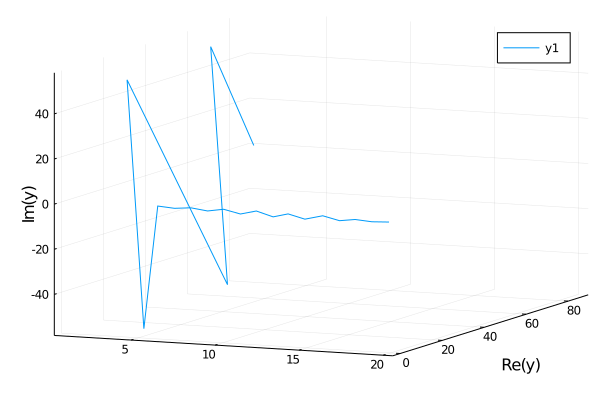

In [8]:
roots1 = Polynomials.roots(wilk_poly)
plot(1:length(roots1), roots1)

In [9]:
roots1

20-element Array{Complex{Float64},1}:
   87.00096132123008 + 0.0im                
  58.454064931940536 + 52.51510000318067im  
  58.454064931940536 - 52.51510000318067im  
   2.580070911242709 + 54.914717435834945im 
   2.580070911242709 - 54.914717435834945im 
  1.1819889158663999 + 0.28129905424771257im
  1.1819889158663999 - 0.28129905424771257im
  0.9073957593365418 + 0.4788001320748179im 
  0.9073957593365418 - 0.4788001320748179im 
  0.5421987534797441 + 0.826811896763315im  
  0.5421987534797441 - 0.826811896763315im  
  0.1115803860079043 + 1.0748076742080537im 
  0.1115803860079043 - 1.0748076742080537im 
 -0.7683167743991741 + 0.9416670965654653im 
 -0.7683167743991741 - 0.9416670965654653im 
 -0.2845305140003272 + 0.865209254927873im  
 -0.2845305140003272 - 0.865209254927873im  
 -0.8643384915117105 + 0.2809937981886191im 
 -0.8643384915117105 - 0.2809937981886191im 
 -0.7211890771556853 + 0.0im                

Slight perturbation of coefficients

In [33]:
coeffs = Polynomials.coeffs(wilk_poly)
r = randn(length(coeffs))
new_coeffs = Array{Float64}(undef, length(coeffs))
for i in 1:length(coeffs)
    new_coeffs[i] = coeffs[i] * (1 + 10^-10 * r[i])
end
perturbed_poly = Polynomial(new_coeffs)

Polynomial(-2.102132736046602e9 - 1.1513855999985423e9*x + 1.217820671688702e9*x^2 - 1.0016138239184952e9*x^3 + 1.0098773759940488e9*x^4 - 1.3077689920823824e9*x^5 - 7.82918799882026e8*x^6 + 2.0256322078624225e9*x^7 - 1.927989583863233e9*x^8 - 8.83979801935712e8*x^9 + 9.367499310103129e8*x^10 - 1.6552994019904242e9*x^11 + 1.6281050131143968e9*x^12 - 1.969404039468466e8*x^13 + 1.517065966107312e9*x^14 - 1.6722808200830412e9*x^15 + 5.332794599725339e7*x^16 - 1.2568499999702612e6*x^17 + 20614.9999988469*x^18 - 210.00000000628498*x^19 + 1.00000000007859*x^20)

┌ Warning: Attribute alias `ylabel` detected in the user recipe defined for the signature (::UnitRange{Int32}, ::Array{Complex{Float64},1}). To ensure expected behavior it is recommended to use the default attribute `yguide`.
└ @ Plots /home/yash/.julia/packages/Plots/E3MWZ/src/pipeline.jl:15
┌ Warning: Attribute alias `zlabel` detected in the user recipe defined for the signature (::UnitRange{Int32}, ::Array{Complex{Float64},1}). To ensure expected behavior it is recommended to use the default attribute `zguide`.
└ @ Plots /home/yash/.julia/packages/Plots/E3MWZ/src/pipeline.jl:15


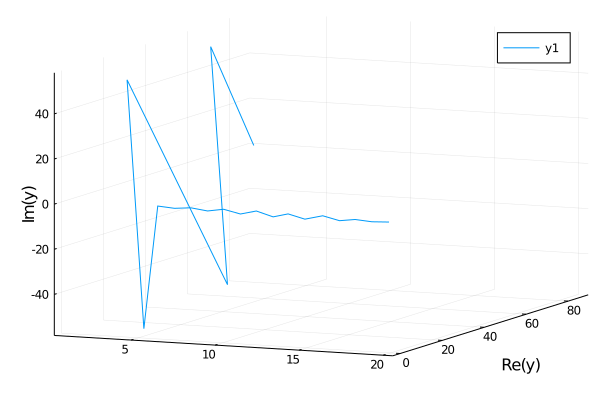

In [35]:
perturbed_roots = Polynomials.roots(perturbed_poly)
plot(1:length(perturbed_roots), perturbed_roots)

In [40]:
perturbed_roots

20-element Array{Complex{Float64},1}:
    87.0009613441972 + 0.0im                
  58.454064918142905 + 52.51509999977127im  
  58.454064918142905 - 52.51509999977127im  
   2.580070908438011 + 54.91471743675919im  
   2.580070908438011 - 54.91471743675919im  
   1.181988915889441 + 0.28129905420971124im
   1.181988915889441 - 0.28129905420971124im
  0.9073957593235761 + 0.4788001320898616im 
  0.9073957593235761 - 0.4788001320898616im 
  0.5421987534738446 + 0.8268118967629652im 
  0.5421987534738446 - 0.8268118967629652im 
 0.11158038600104993 + 1.0748076741960844im 
 0.11158038600104993 - 1.0748076741960844im 
 -0.7683167743857897 + 0.9416670965579063im 
 -0.7683167743857897 - 0.9416670965579063im 
 -0.2845305139985768 + 0.8652092549206314im 
 -0.2845305139985768 - 0.8652092549206314im 
 -0.8643384914997974 + 0.28099379820357634im
 -0.8643384914997974 - 0.28099379820357634im
 -0.7211890771855353 + 0.0im                

In [37]:
roots1

20-element Array{Complex{Float64},1}:
   87.00096132123008 + 0.0im                
  58.454064931940536 + 52.51510000318067im  
  58.454064931940536 - 52.51510000318067im  
   2.580070911242709 + 54.914717435834945im 
   2.580070911242709 - 54.914717435834945im 
  1.1819889158663999 + 0.28129905424771257im
  1.1819889158663999 - 0.28129905424771257im
  0.9073957593365418 + 0.4788001320748179im 
  0.9073957593365418 - 0.4788001320748179im 
  0.5421987534797441 + 0.826811896763315im  
  0.5421987534797441 - 0.826811896763315im  
  0.1115803860079043 + 1.0748076742080537im 
  0.1115803860079043 - 1.0748076742080537im 
 -0.7683167743991741 + 0.9416670965654653im 
 -0.7683167743991741 - 0.9416670965654653im 
 -0.2845305140003272 + 0.865209254927873im  
 -0.2845305140003272 - 0.865209254927873im  
 -0.8643384915117105 + 0.2809937981886191im 
 -0.8643384915117105 - 0.2809937981886191im 
 -0.7211890771556853 + 0.0im                